# 02: Exploratory Data Analysis

Note: 2021-03-16, anaconda required installation of imblearn from conda forge. The command used was: `conda install -c conda-forge imbalanced-learn`
 

### Imported Libraries

In [1]:
import sys
print('Python version: %s' % (sys.version))

# data management
print('\nData Management Libraries')
import pandas as pd
print('\tpandas version: %s' % (pd.__version__))
import numpy as np
print('\tnumpy version: %s' % (np.__version__))
import regex as re
print('\tregex version: %s' % (re.__version__))

# visualizing
print('\nVisualization Libraries')
from matplotlib import pyplot as plt
import matplotlib
print('\tmatplotlib version: %s' % (matplotlib.__version__))
import seaborn as sns
print('\tseaborn version: %s' % (sns.__version__))

# preprocessing



# modeling
print('\nModeling Libraries')
import imblearn
print('\timblearn version: %s' % imblearn.__version__)
import sklearn
print('\tsklearn version: %s' % sklearn.__version__)

Python version: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]

Data Management Libraries
	pandas version: 1.2.3
	numpy version: 1.19.2
	regex version: 2.5.91

Visualization Libraries
	matplotlib version: 3.3.4
	seaborn version: 0.11.1

Modeling Libraries
	imblearn version: 0.8.0
	sklearn version: 0.24.1


### Update Library Settings

In [2]:
# update pandas settings
pd.options.display.max_columns = 12
pd.set_option('max_colwidth', 100) # sets the max number of columns before truncating with an ellipse
pd.options.display.max_rows = 500
pd.set_option('precision',6)

### Read in Data

In [3]:
df = pd.read_csv('../data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,...,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,...,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,...,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,...,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,...,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,...,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,...,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,...,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,...,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


### Class Counts

In [8]:
# Class column represents fraudulent data, where 0 = not fraudulent and 1 = fraudulent
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

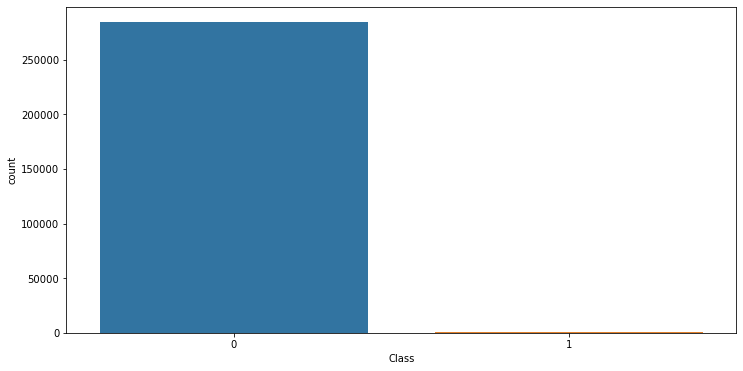

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.countplot(x=df.Class, data=df)
plt.show()

### Exploring Amount, Time

C:\Users\bushjam\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bushjam\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


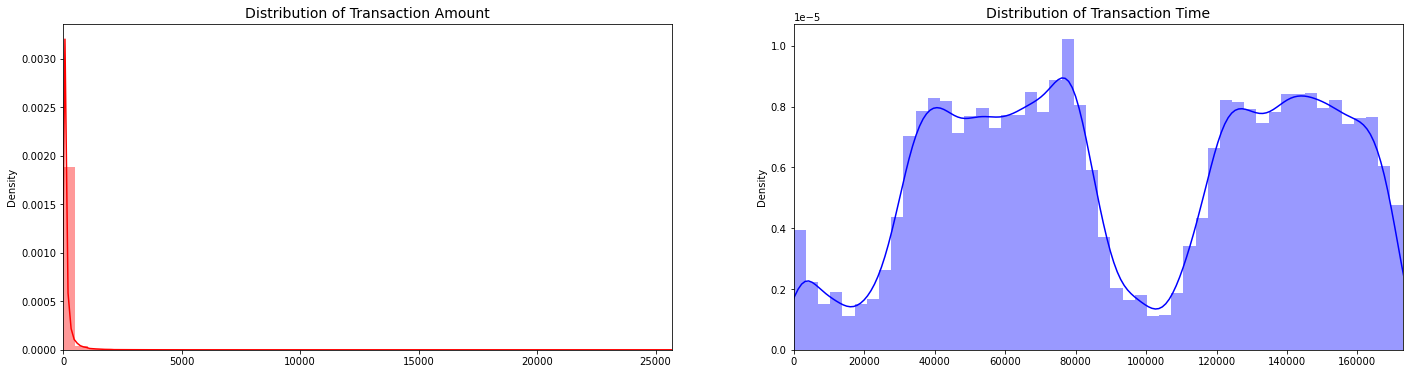

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(24,6))

time_val = df['Time'].values
amount_val = df['Amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Distribution of Transaction Amount by Class

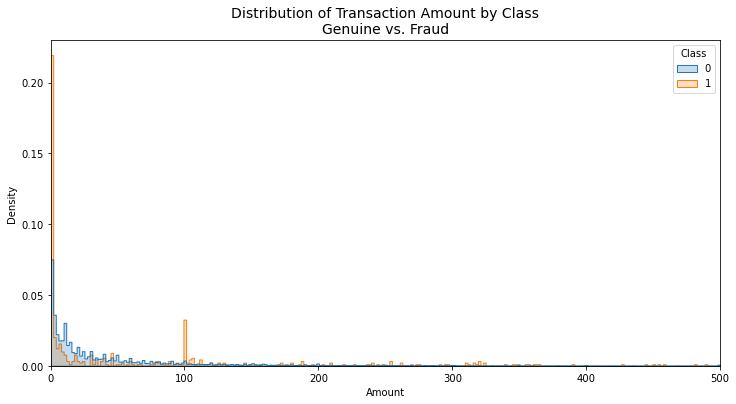

Wall time: 672 ms


In [11]:
%%time

#df[df.Amount <= 500]

data = df[df.Amount <= 500]

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=data, x="Amount",hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(data.Amount), max(data.Amount)]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Amount by Class\nGenuine vs. Fraud', fontsize=14)
#plt.legend(['fraud','genuine'])
#plt.tight_layout()
plt.show()

### Looking at 1USD Transaction Proportionally

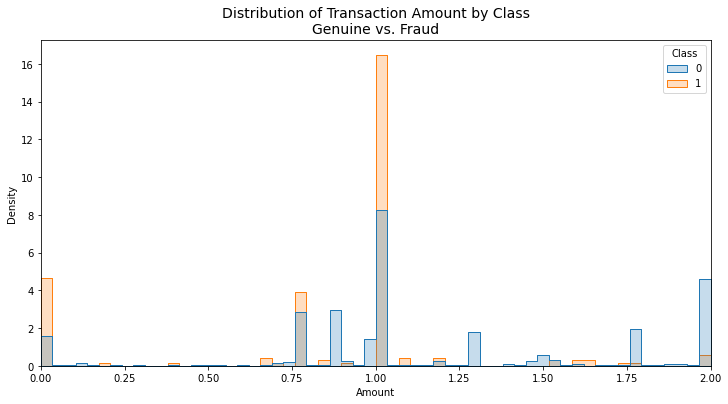

Wall time: 525 ms


In [12]:
%%time

#df[df.Amount <= 500]

data = df[df.Amount <= 2]

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=data, x="Amount",hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(data.Amount), max(data.Amount)]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Amount by Class\nGenuine vs. Fraud', fontsize=14)
#plt.legend(['fraud','genuine'])
#plt.tight_layout()
plt.show()

### Looking at 100 USD Transaction Proportionally

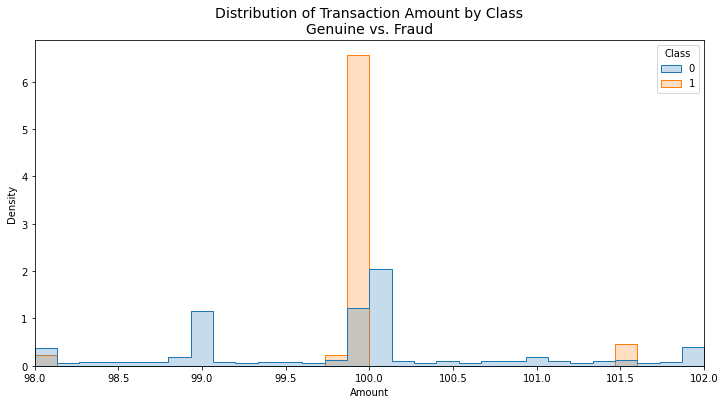

Wall time: 461 ms


In [27]:
%%time

#df[df.Amount <= 500]

data = df[(df.Amount >= 98)&(df.Amount <= 102)]

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=data, x="Amount",hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(data.Amount), max(data.Amount)]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Amount by Class\nGenuine vs. Fraud', fontsize=14)
#plt.legend(['fraud','genuine'])
#plt.tight_layout()
plt.show()

In [14]:
len(df[(df.Class==0)&(df.Amount==1)])/len(df[df.Class==0])

0.04774633768883105

In [15]:
len(df[(df.Class==1)&(df.Amount==1)])/len(df[df.Class==1])

0.22967479674796748

### Distribution of Time by Class, Raw

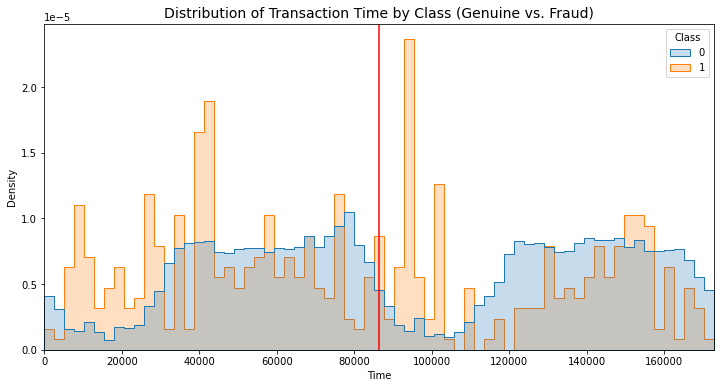

Wall time: 600 ms


In [16]:
%%time

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=df, x="Time",hue="Class",stat="density",common_norm=False,element="step") # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(df.Time), max(df.Time)]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Time by Class (Genuine vs. Fraud)', fontsize=14)
plt.axvline(86400, 0, max(df.Time),color="r")
plt.show()

### Day conversion assumptions
The Time feature contains the seconds elapsed between each transaction and the first transaction in the dataset. The max value from the Time feature is 172,792, representing a period of almost 2 days from the first transaction.

In [17]:
seconds_per_day = 86400
df['Time_DayAware'] = df.Time.apply(lambda x:x if x < seconds_per_day else x-seconds_per_day)

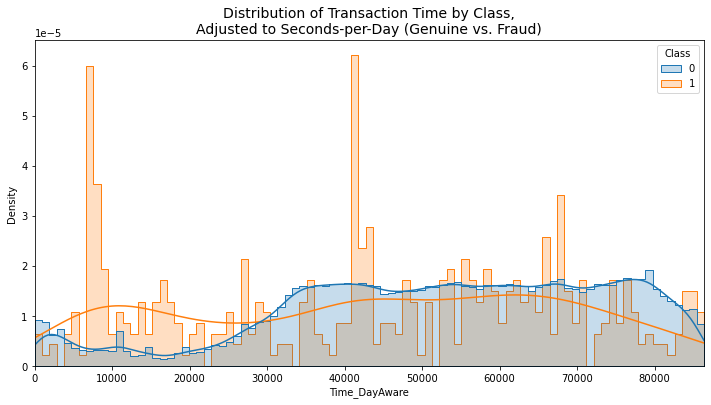

Wall time: 1.92 s


In [18]:
%%time
feature = "Time_DayAware"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=df, x=feature,hue="Class",stat="density",common_norm=False,element="step",kde=True) # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Time by Class,\nAdjusted to Seconds-per-Day (Genuine vs. Fraud)', fontsize=14)
plt.show()

### By Hour

In [19]:
seconds_per_hour = 3600
df['Time_DayAware_byHour'] = df.Time_DayAware.apply(lambda x: x/seconds_per_hour)

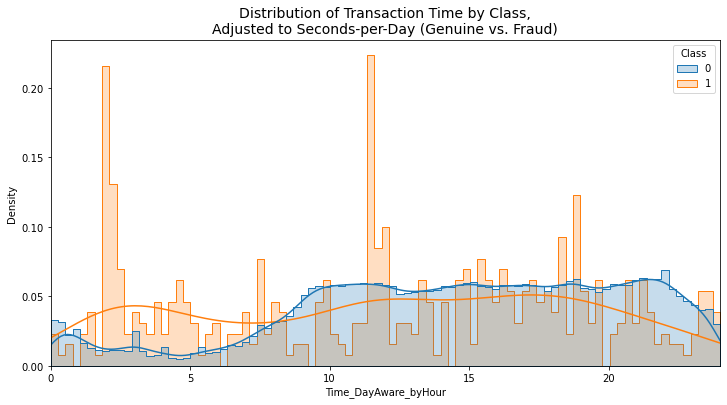

Wall time: 1.83 s


In [20]:
%%time

feature = "Time_DayAware_byHour"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=df, x=feature,hue="Class",stat="density",common_norm=False,element="step",kde=True) # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
ax.set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
ax.set_title('Distribution of Transaction Time by Class,\nAdjusted to Seconds-per-Day (Genuine vs. Fraud)', fontsize=14)
plt.show()


### Checking PCA-Transformed Features for Feature Scaling

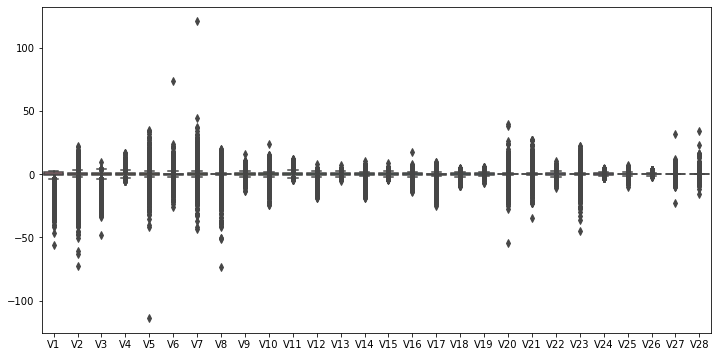

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(data=df.iloc[:,1:29],orient='v')
plt.show()

### Looking at Distributions

In [22]:
def plot_feature_density_dist_hist(df,feature):
    
    fig, ax = plt.subplots(1, 2, figsize=(24,6))
    
    sns.histplot(data=df,ax=ax[0],x=feature,stat="density",common_norm=False,element="step",kde=True) # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
    ax[0].set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
    ax[0].set_title('Distribution of %s (Genuine vs. Fraud)' % (feature), fontsize=14)
    
    sns.histplot(data=df,ax=ax[1],x=feature,hue="Class",stat="density",common_norm=False,element="step",kde=True) # step handles overlap, hue handles separating dataset based on category, stat makes histogram a density plot, common_norm
    ax[1].set_xlim([min(df[feature]), max(df[feature])]) # make sure to specify the 'Amount' column for the count. The initial data variable 'zooms' the table by restricting the amounts to ~500. 2 SDs from mean is roughly ~588.58 so this captures roughly the 2SD set
    ax[1].set_title('Distribution of %s (Genuine vs. Fraud)' % (feature), fontsize=14)
    
    plt.show()

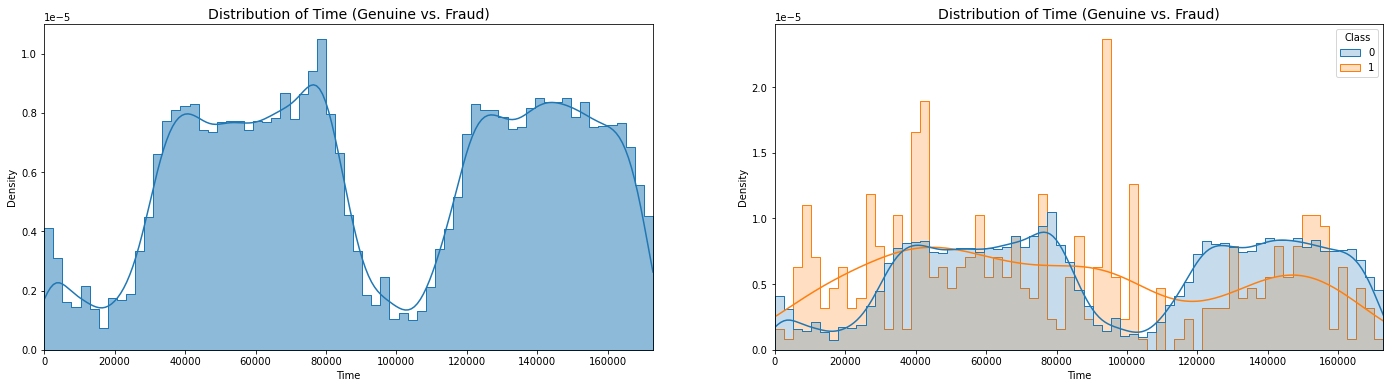

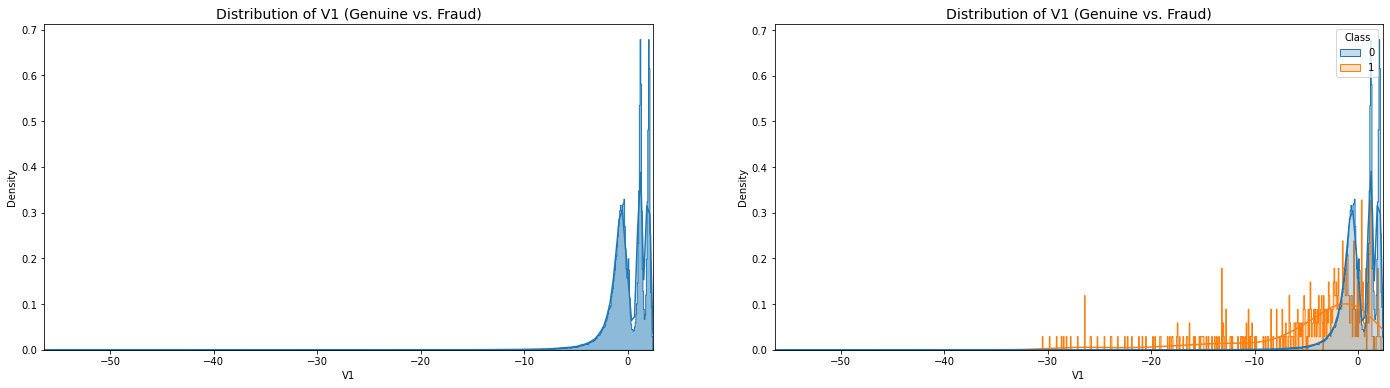

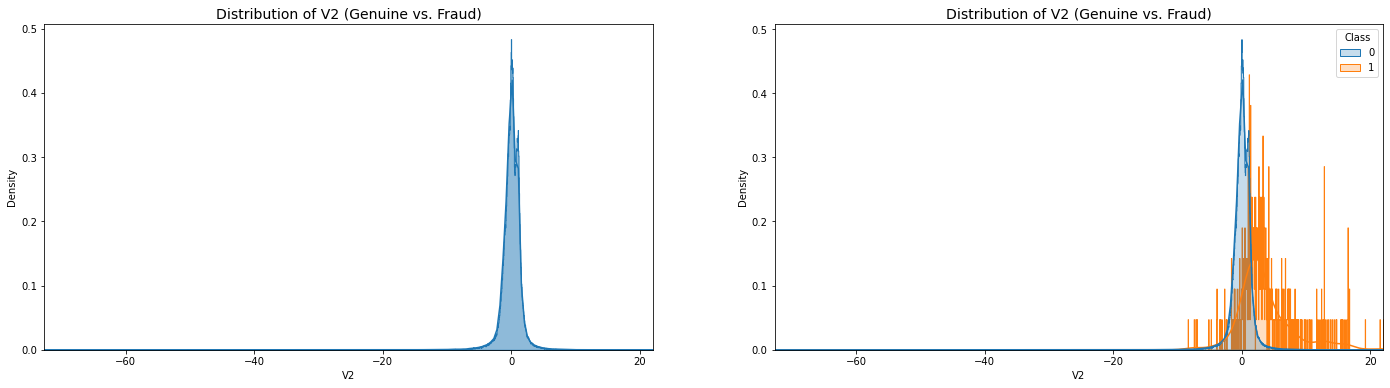

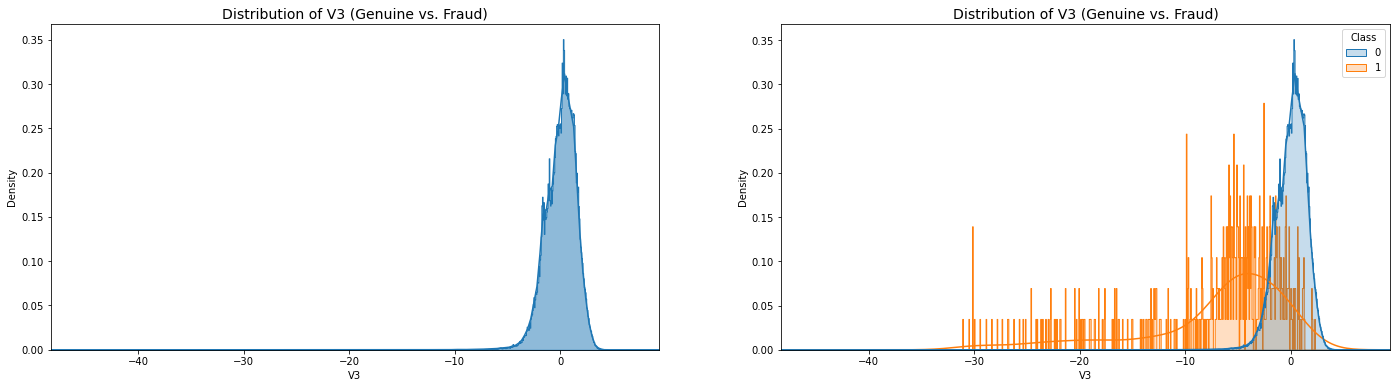

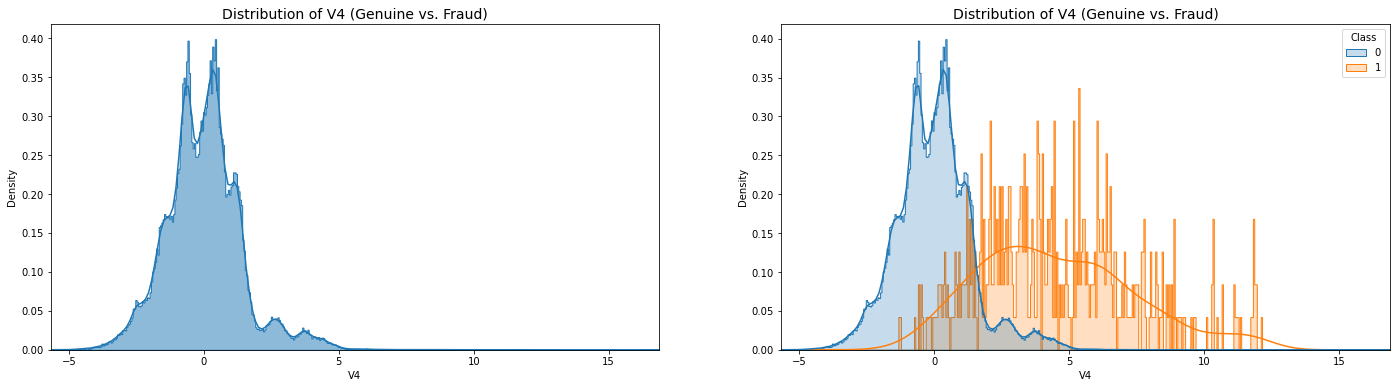

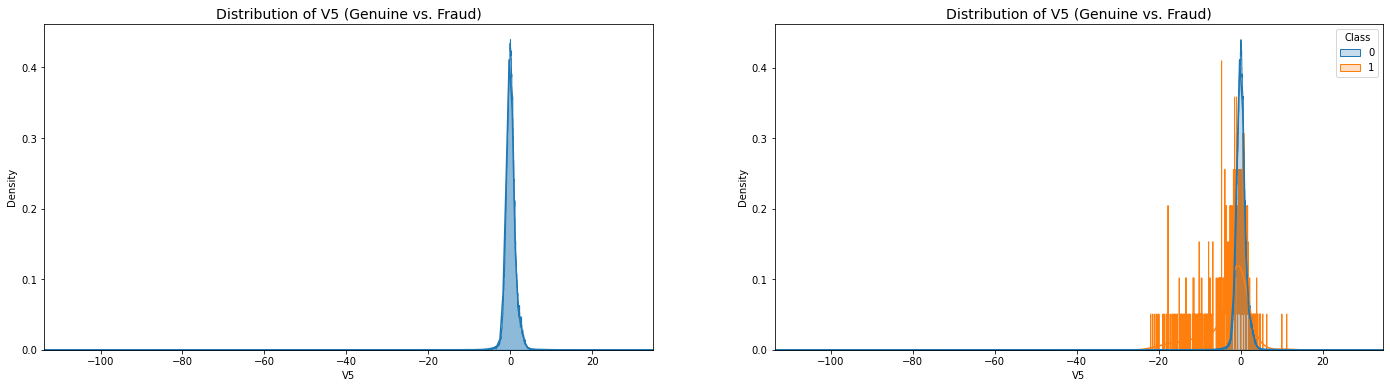

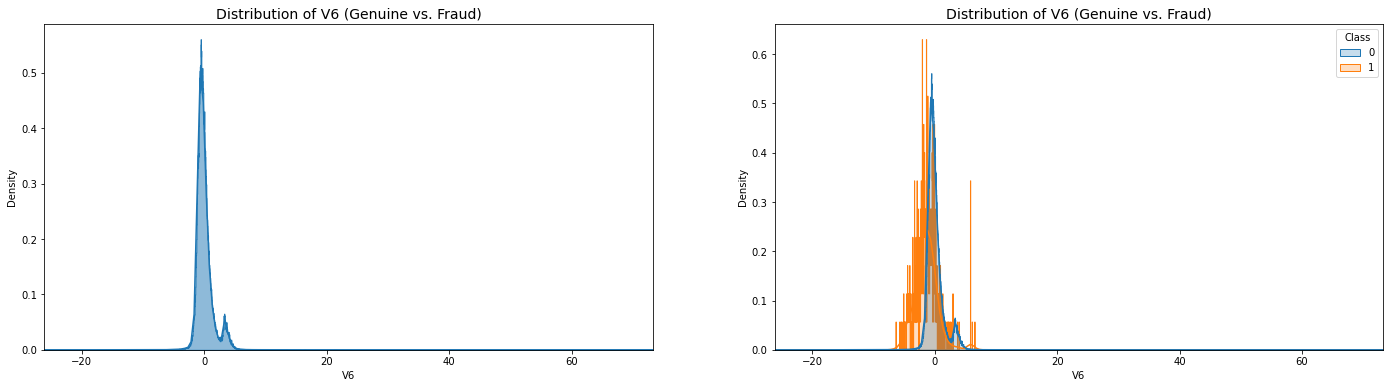

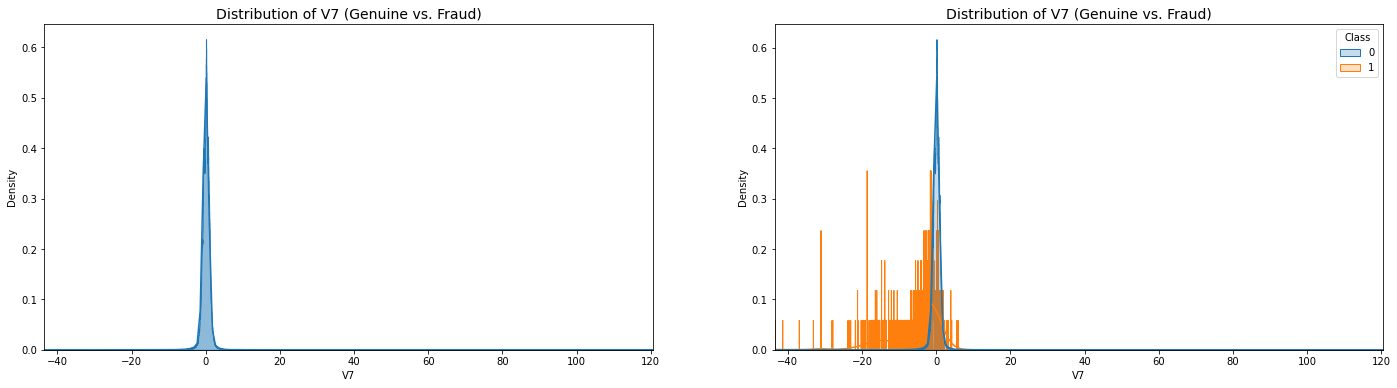

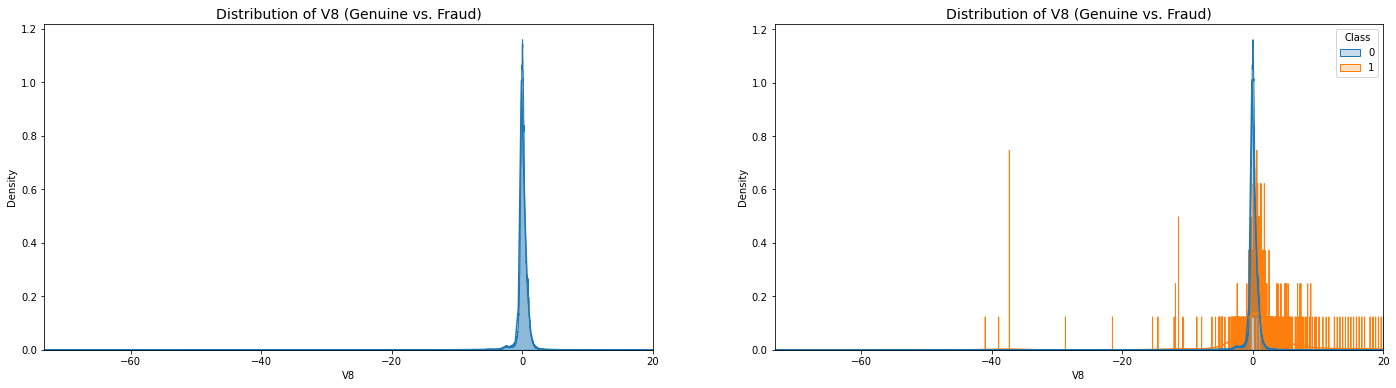

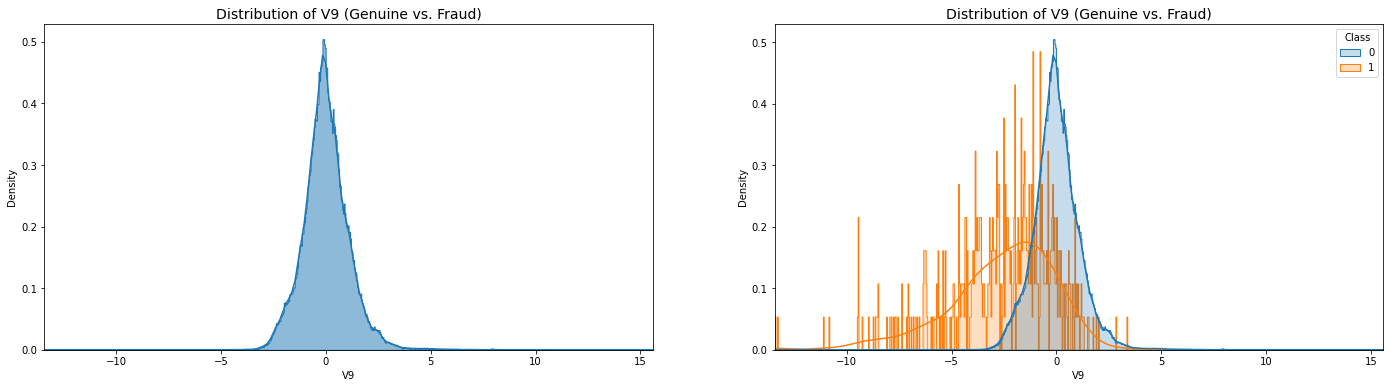

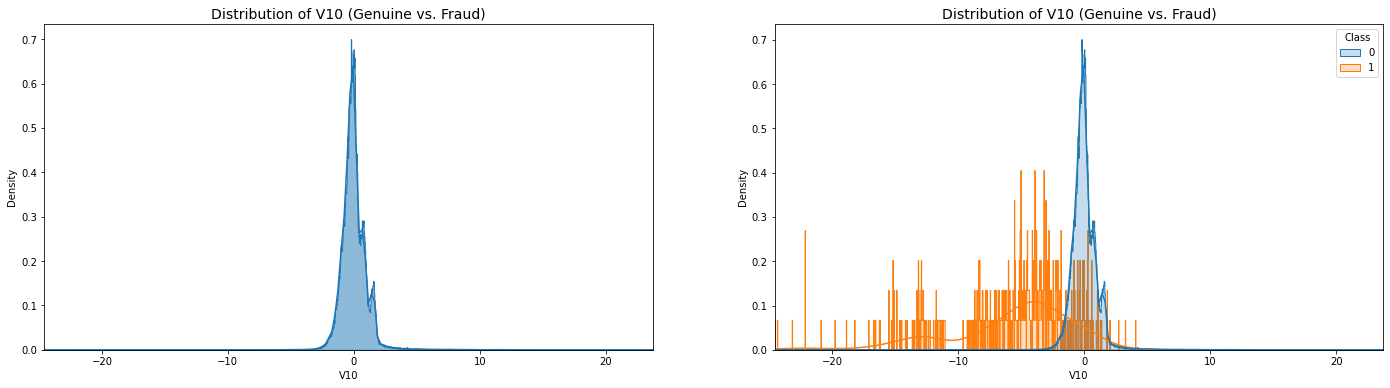

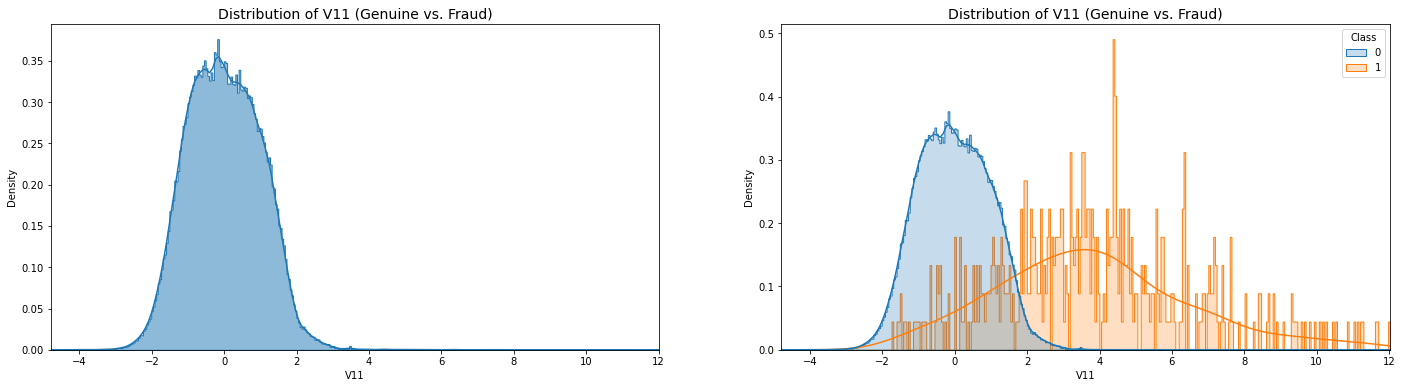

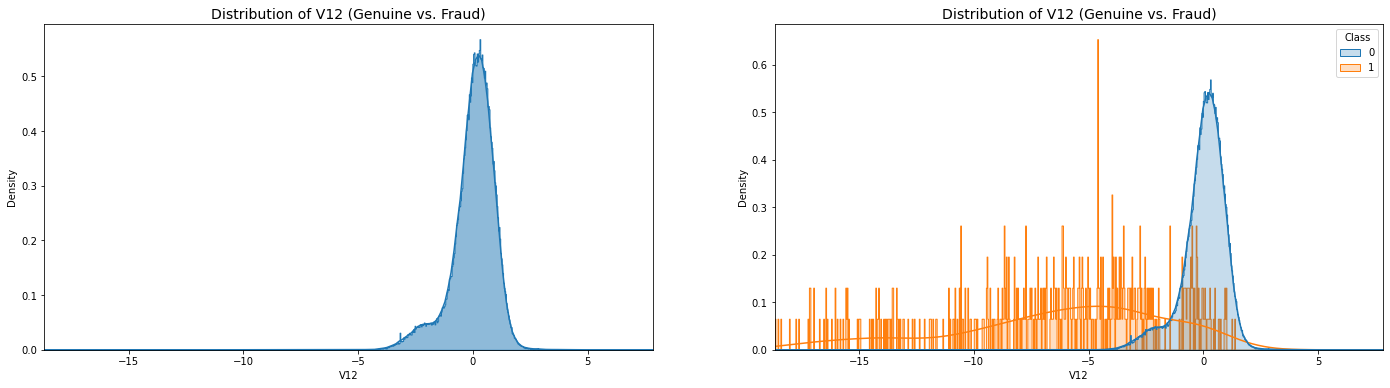

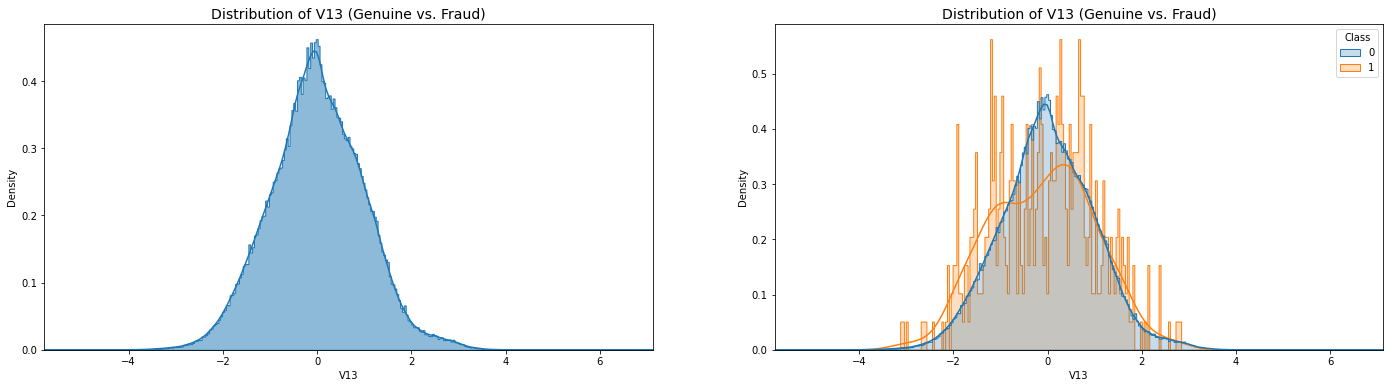

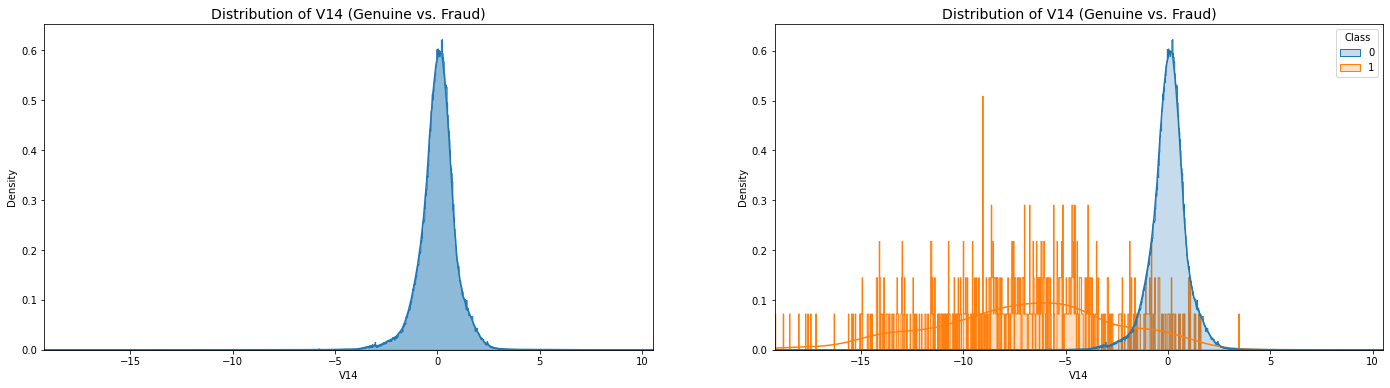

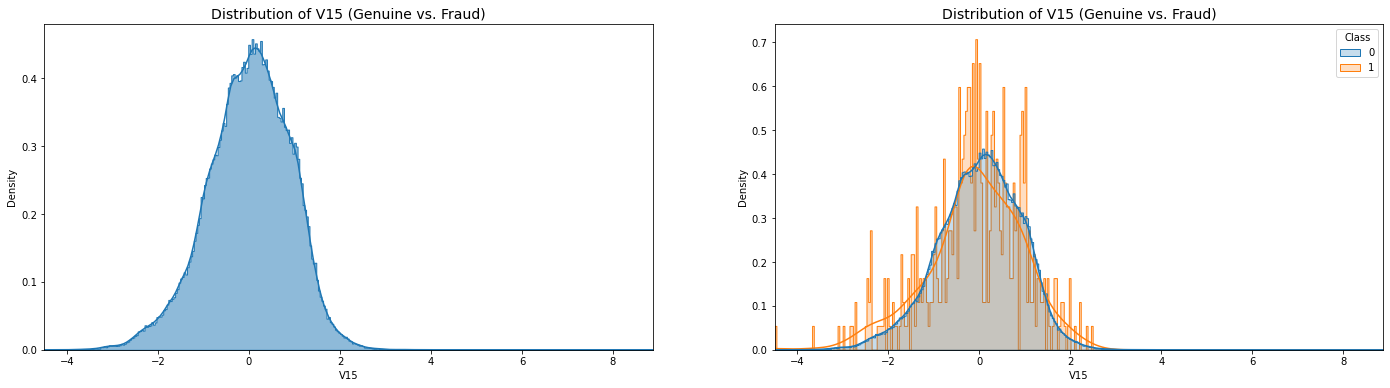

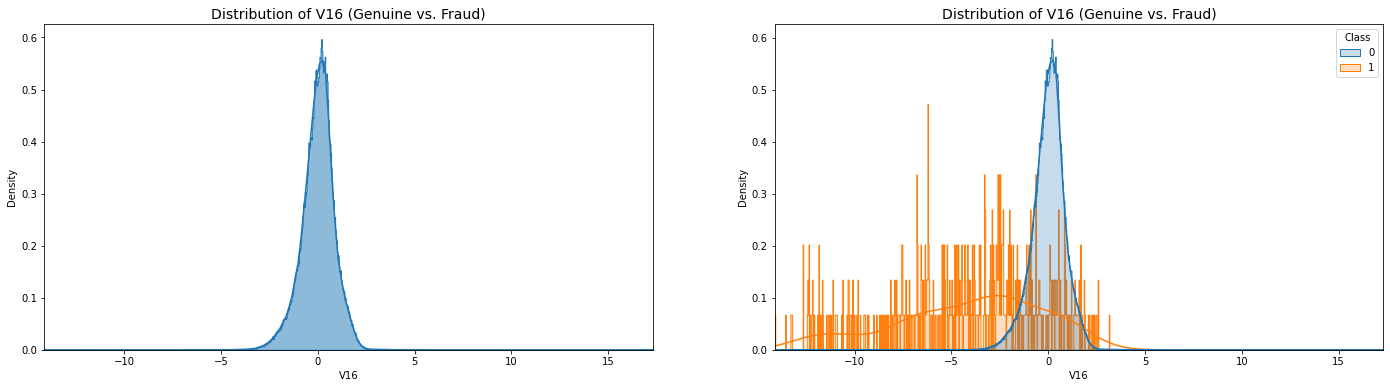

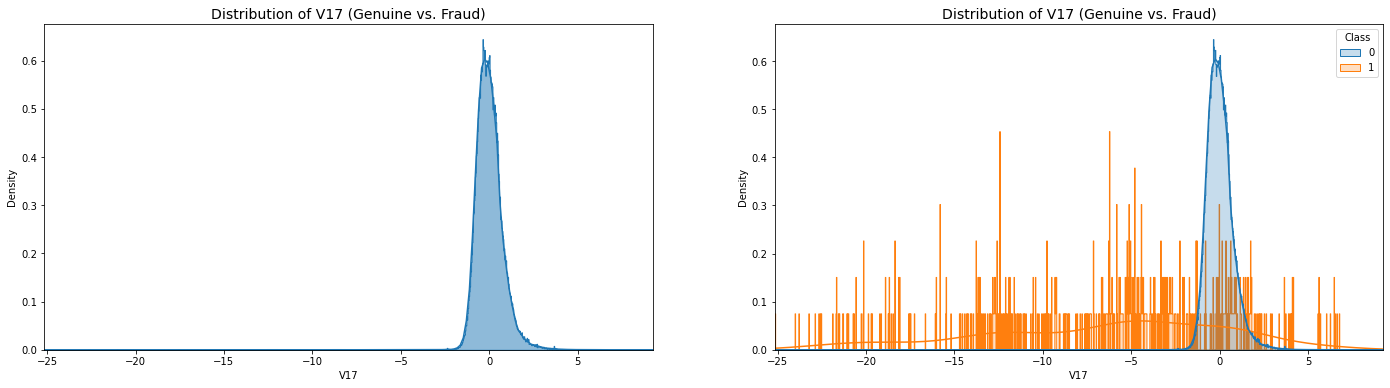

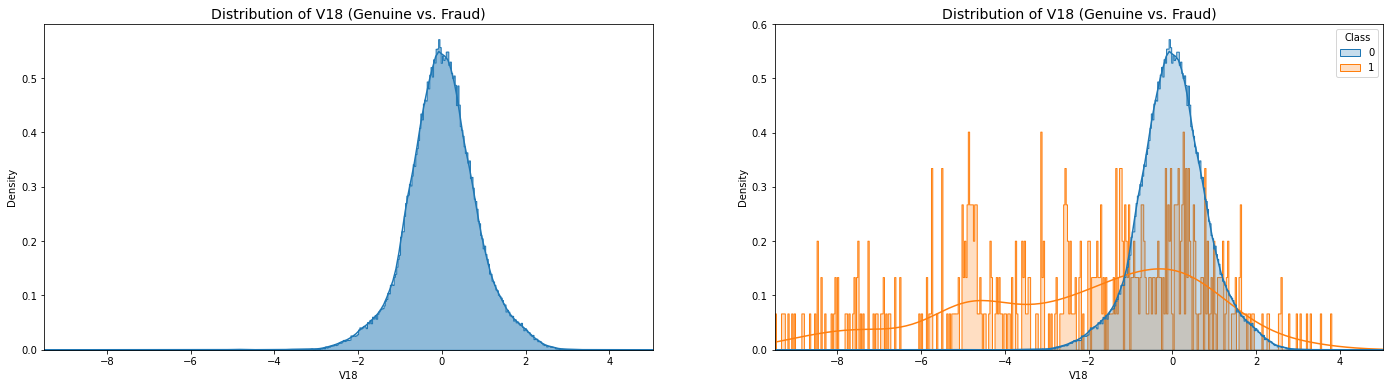

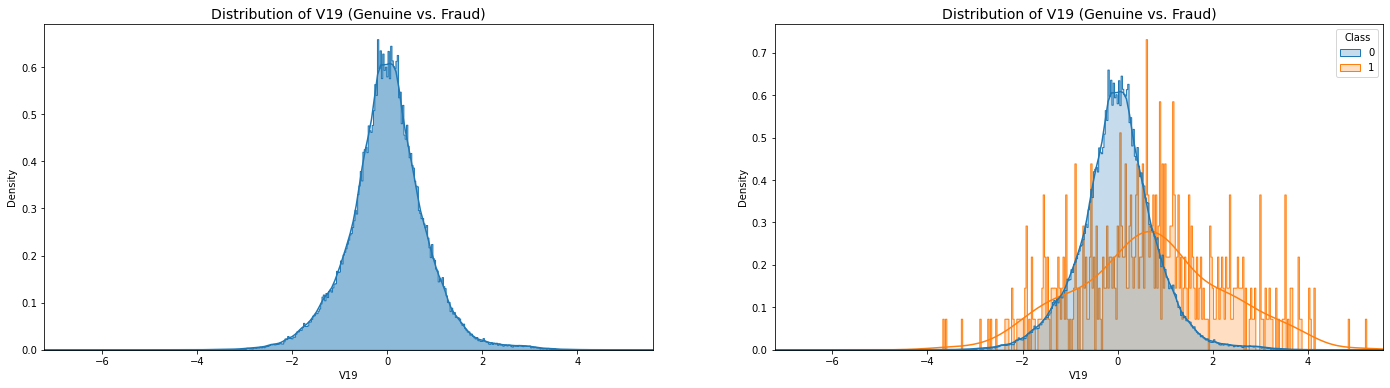

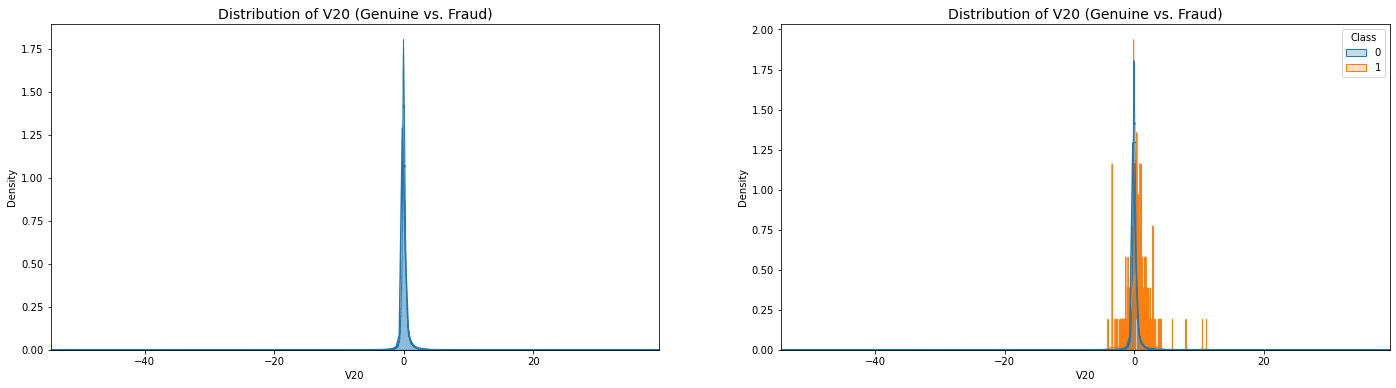

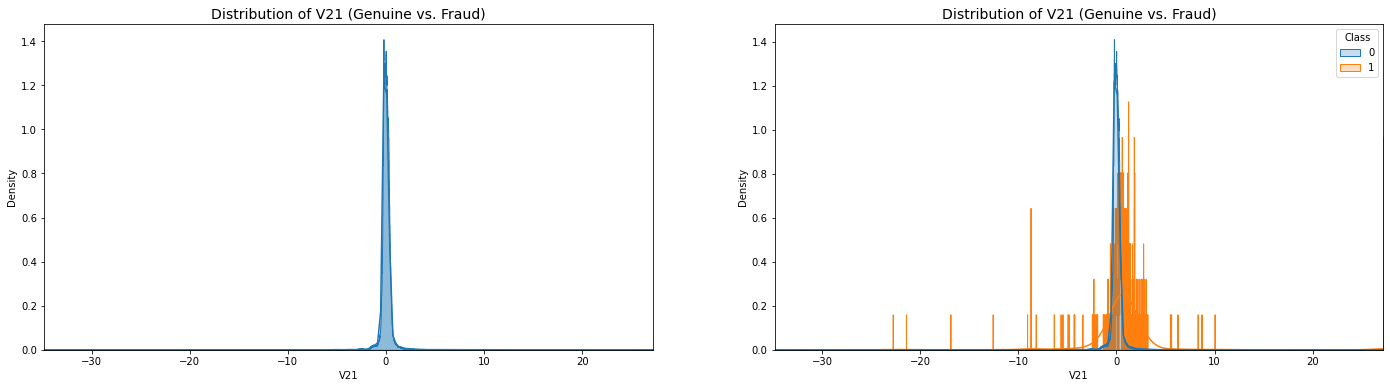

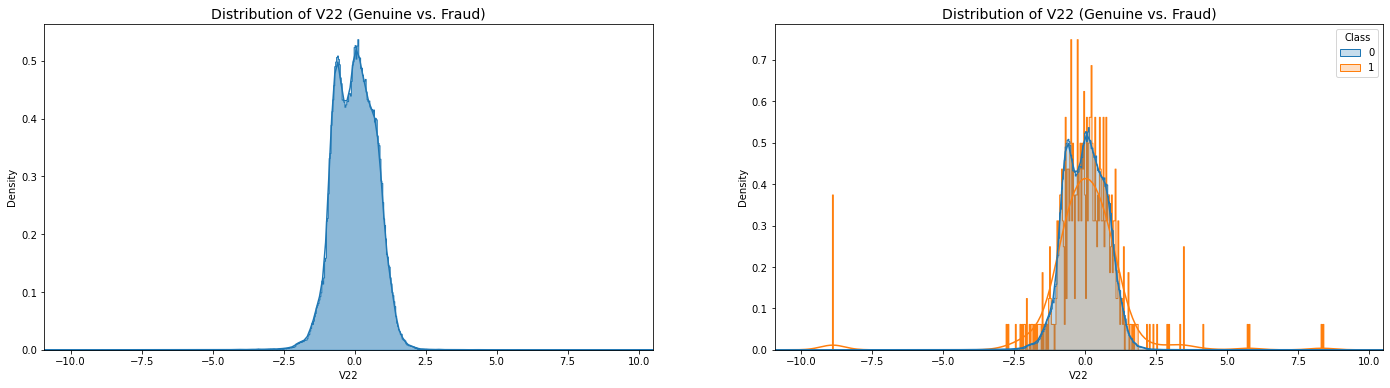

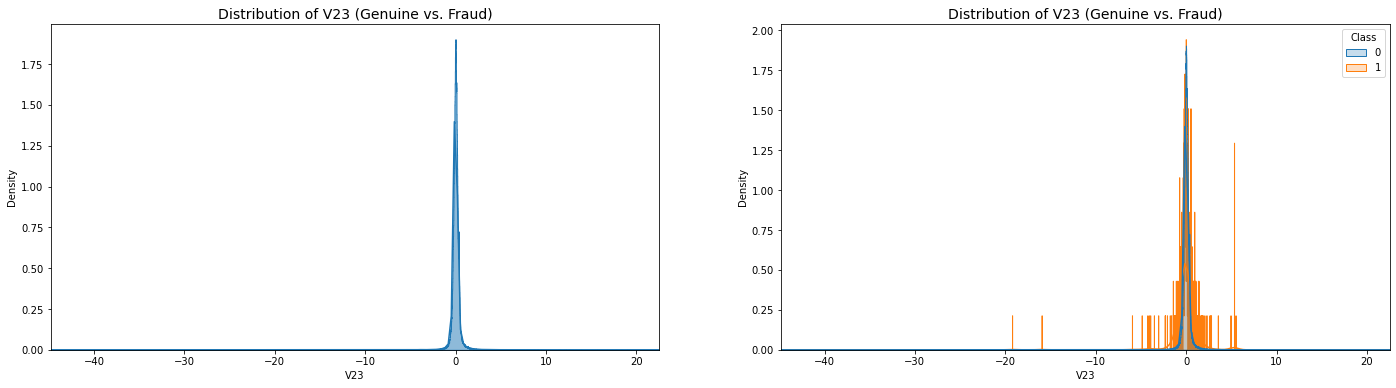

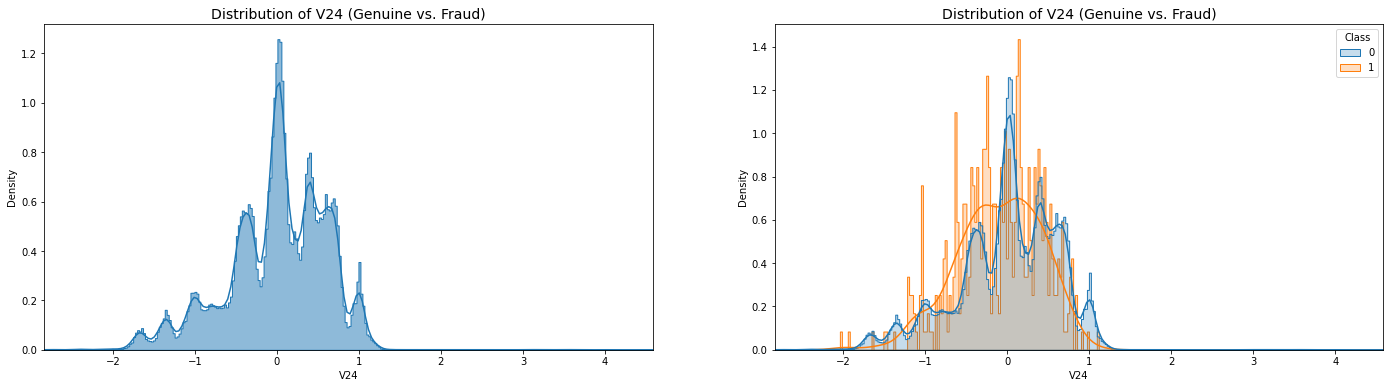

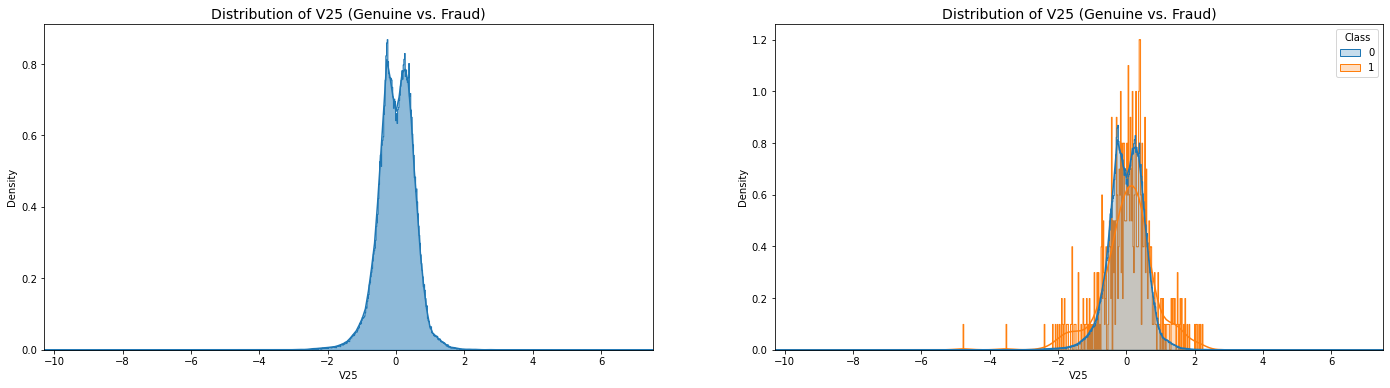

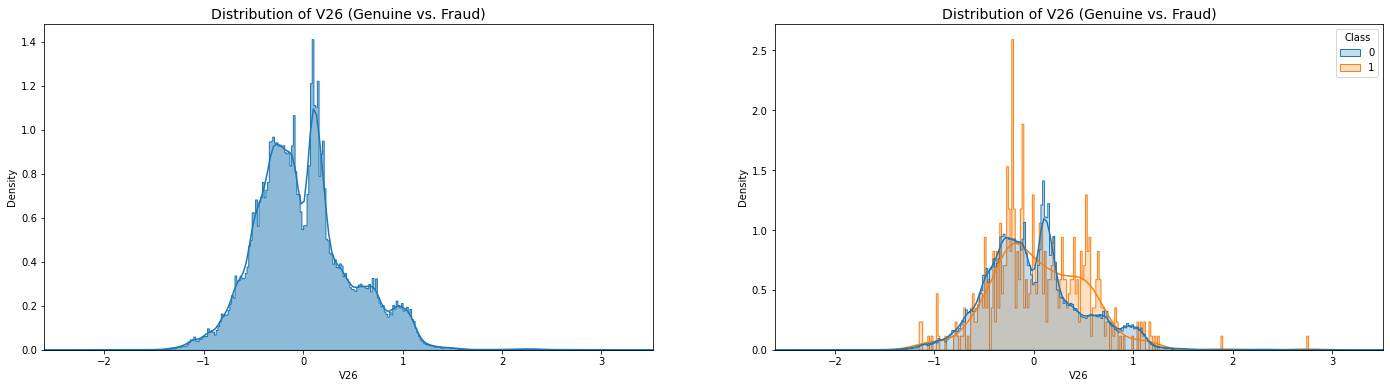

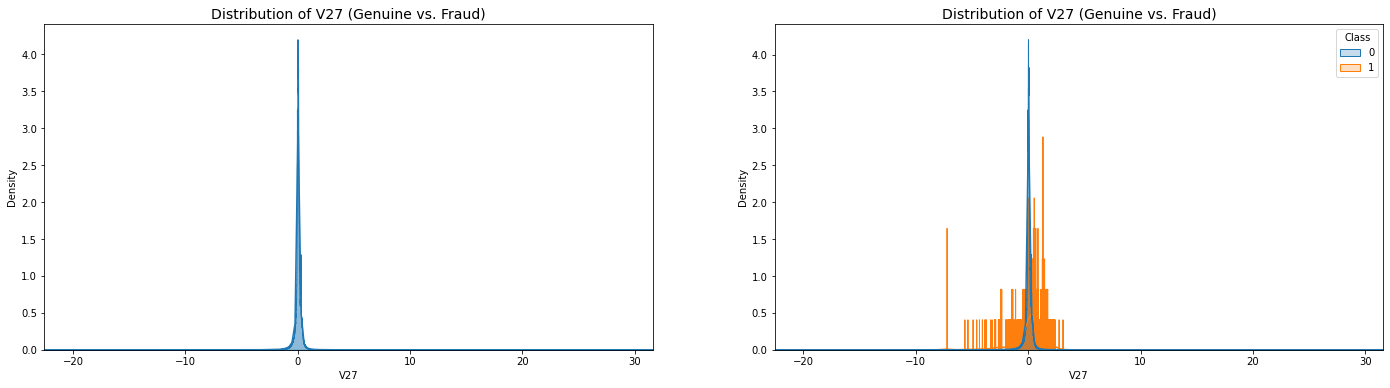

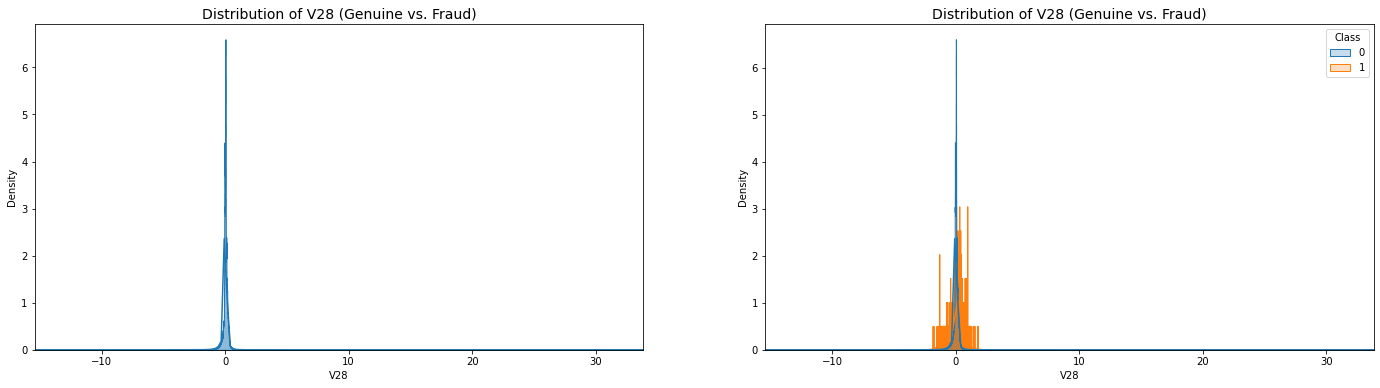

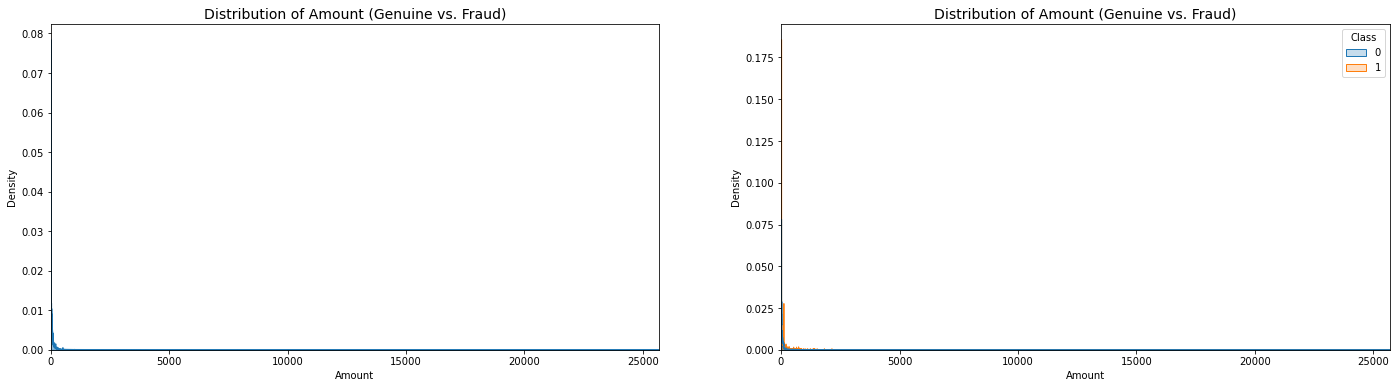

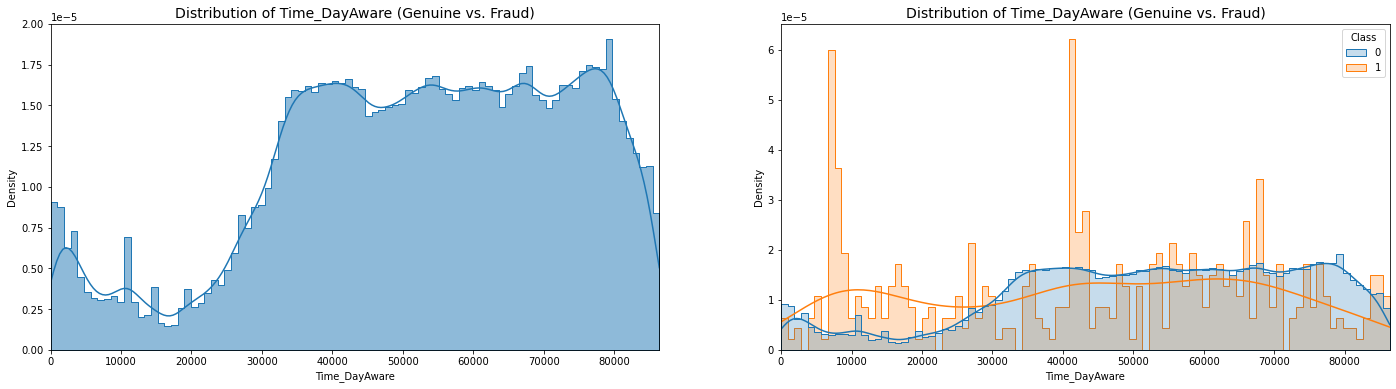

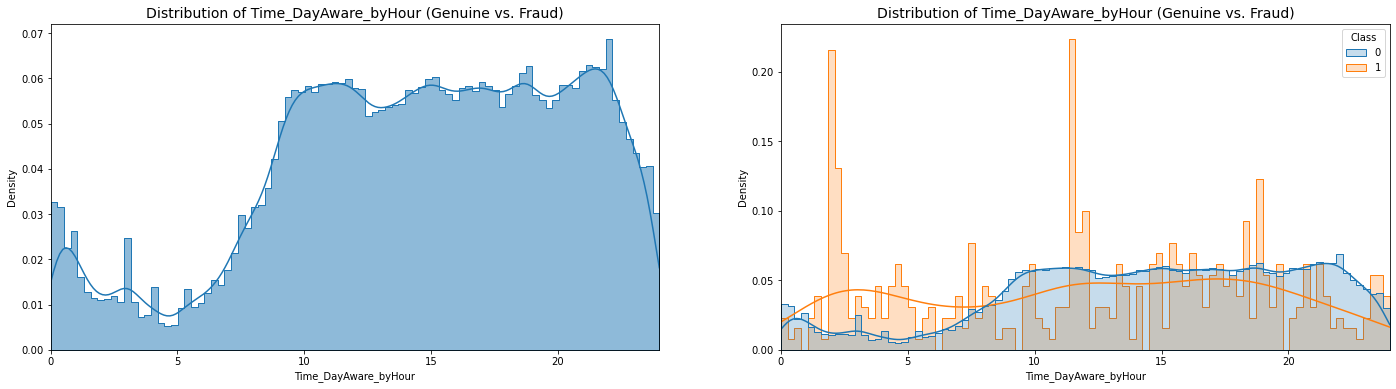

In [23]:
for c in df:
    if c != 'Class':
        plot_feature_density_dist_hist(df,c)

### Output Adjusted Dataframe

In [24]:
df.to_csv('../data/creditcard_02.csv',index=False)